In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

subspace_num = [1, 2, 4, 8, 16, 32, 0]

In [2]:
method_legend_name = ["Harmonica (2 order)", "Harmonica (3 order)", "LIME", "SHAP", "Integrated Gradients", "Integrated Hessians", "Shapley Taylor Index (2 order)"]

In [3]:
L2_inconsistency = np.zeros((len(method_legend_name),7))
L1_inconsistency = np.zeros((len(method_legend_name),7))
L0_inconsistency = np.zeros((len(method_legend_name),7))

In [65]:
for mm in range(7):
    print(2**mm, end=" & ")
    print("%.4f" % L2_inconsistency[method_legend_name.index("Shapley Taylor Index (2 order)")][mm], end=" & ")
    print("%.4f" % L1_inconsistency[method_legend_name.index("Shapley Taylor Index (2 order)")][mm], end=" & ")
    print("%.4f" % L0_inconsistency[method_legend_name.index("Shapley Taylor Index (2 order)")][mm], end=" \\\\ \hline \n")

1 & 0.0100 & 0.0365 & 0.0554 \\ \hline 
2 & 0.0157 & 0.0470 & 0.0999 \\ \hline 
4 & 0.0296 & 0.0538 & 0.1339 \\ \hline 
8 & 0.0585 & 0.0542 & 0.1300 \\ \hline 
16 & 0.1201 & 0.0558 & 0.1287 \\ \hline 
32 & 0.2038 & 0.0575 & 0.1294 \\ \hline 
64 & 0.2139 & 0.0577 & 0.1294 \\ \hline 


In [6]:
print("Harmonica 2 order")
degree = 2
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_0_500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_500_1000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_1000_1500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_2000_2500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_2500_3000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_3000_3500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_3500_4000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_4000_5500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_5500_7000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_7000_8500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_8500_10000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_10000_11250.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_11250_12500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_12500_13750.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_13750_15000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_15000_16250.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_16250_17500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_17500_18750.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_18750_20000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_20000_21250.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_21250_22500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_22500_23750.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_23750_25000.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_0_500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_500_1000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_1000_1500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_2000_2500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_2500_3000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_3000_3500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_3500_4000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_4000_5500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_5500_7000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_7000_8500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_8500_10000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_10000_11250.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_11250_12500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_12500_13750.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_13750_15000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_15000_16250.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_16250_17500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_17500_18750.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_18750_20000.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_20000_21250.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_21250_22500.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_22500_23750.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_23750_25000.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Harmonica (2 order)")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Harmonica (2 order)")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Harmonica (2 order)")][idx] = L0_norm / len(final_lasso_output)

    idx += 1

Harmonica 2 order
subspace 1
L2 0.0007
L1 0.0192
L0 0.004
subspace 2
L2 0.0007
L1 0.0193
L0 0.0035
subspace 4
L2 0.0011
L1 0.0228
L0 0.014
subspace 8
L2 0.0022
L1 0.0298
L0 0.0433
subspace 16
L2 0.0028
L1 0.0329
L0 0.0573
subspace 32
L2 0.0029
L1 0.0334
L0 0.0595
subspace infinity
L2 0.0029
L1 0.0334
L0 0.0596


In [44]:
print("Harmonica 3 order")
degree = 3
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_0_500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_500_1000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_1000_1500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_2000_2500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_2500_3000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_3000_3500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_3500_4000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_4000_4500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_4500_5000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_5000_5500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_5500_6000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_6000_6500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_6500_7000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_7000_7500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_7500_8000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_8000_9000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_9000_10000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_10000_11000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_11000_12000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_12000_13000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_13000_14000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_14000_15000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_15000_16000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_16000_17000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_17000_18000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_18000_19000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_19000_20000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_20000_21250.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_21250_22500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_22500_23750.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_23750_25000.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_0_500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_500_1000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_1000_1500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_2000_2500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_2500_3000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_3000_3500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_3500_4000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_4000_4500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_4500_5000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_5000_5500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_5500_6000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_6000_6500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_6500_7000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_7000_7500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_7500_8000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_8000_9000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_9000_10000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_10000_11000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_11000_12000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_12000_13000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_13000_14000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_14000_15000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_15000_16000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_16000_17000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_17000_18000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_18000_19000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_19000_20000.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_20000_21250.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_21250_22500.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_22500_23750.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_23750_25000.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Harmonica (3 order)")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Harmonica (3 order)")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Harmonica (3 order)")][idx] = L0_norm / len(final_lasso_output)

    idx += 1

Harmonica 3 order
subspace 1
L2 0.0005
L1 0.0149
L0 0.0027
subspace 2
L2 0.0005
L1 0.0157
L0 0.0022
subspace 4
L2 0.0008
L1 0.0195
L0 0.0098
subspace 8
L2 0.0018
L1 0.0265
L0 0.0367
subspace 16
L2 0.0024
L1 0.0296
L0 0.0505
subspace 32
L2 0.0025
L1 0.0301
L0 0.0527
subspace infinity
L2 0.0025
L1 0.0301
L0 0.0528


In [12]:
print("\nKernelSHAP")
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_0_500.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_500_1000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_1000_1500.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_2000_4000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_4000_6000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_6000_8000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_8000_10000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_10000_12000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_12000_14000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_14000_16000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_16000_18000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_18000_20000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_20000_22000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_22000_24000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_24000_25000.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_0_500.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_500_1000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_1000_1500.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_2000_4000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_4000_6000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_6000_8000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_8000_10000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_10000_12000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_12000_14000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_14000_16000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_16000_18000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_18000_20000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_20000_22000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_22000_24000.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_24000_25000.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0
    _baseline = 0.

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model + _baseline) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model + _baseline)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model + _baseline) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("SHAP")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("SHAP")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("SHAP")][idx] = L0_norm / len(final_lasso_output)
    idx += 1


KernelSHAP
subspace 1
L2 0.0091
L1 0.065
L0 0.2266
subspace 2
L2 0.0149
L1 0.0903
L0 0.3589
subspace 4
L2 0.0223
L1 0.1162
L0 0.4891
subspace 8
L2 0.0284
L1 0.1341
L0 0.561
subspace 16
L2 0.0306
L1 0.1402
L0 0.5817
subspace 32
L2 0.031
L1 0.1411
L0 0.5842
subspace infinity
L2 0.031
L1 0.1411
L0 0.5843


In [8]:
print("\nLIME")
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_0_500.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_500_1000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_1000_1500.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_2000_2500.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_2500_3000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_3000_3500.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_3500_4000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_4000_4500.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_4500_5000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_5000_5500.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_5500_6000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_6000_7000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_7000_8000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_8000_9000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_9000_10000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_10000_12000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_12000_14000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_14000_16000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_16000_18000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_18000_19750.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_19750_21500.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_21500_23250.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_23250_25000.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_0_500.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_500_1000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_1000_1500.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_2000_2500.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_2500_3000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_3000_3500.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_3500_4000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_4000_4500.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_4500_5000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_5000_5500.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_5500_6000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_6000_7000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_7000_8000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_8000_9000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_9000_10000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_10000_12000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_12000_14000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_14000_16000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_16000_18000.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_18000_19750.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_19750_21500.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_21500_23250.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_23250_25000.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("LIME")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("LIME")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("LIME")][idx] = L0_norm / len(final_lasso_output)
    idx += 1


LIME
subspace 1
L2 0.0063
L1 0.0525
L0 0.1175
subspace 2
L2 0.0071
L1 0.0546
L0 0.1358
subspace 4
L2 0.0082
L1 0.0583
L0 0.1606
subspace 8
L2 0.0096
L1 0.064
L0 0.1903
subspace 16
L2 0.0102
L1 0.0664
L0 0.2017
subspace 32
L2 0.0103
L1 0.0667
L0 0.2033
subspace infinity
L2 0.0103
L1 0.0667
L0 0.2033


In [14]:
print("\nIG")
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_0_500.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_500_1000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_1000_1500.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_2000_2500.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_2500_3000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_3000_3500.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_3500_4000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_4000_4500.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_4500_5000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_5000_5500.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_5500_6000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_6000_7000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_7000_8000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_8000_9000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_9000_10000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_10000_12000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_12000_14000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_14000_16000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_16000_18000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_18000_19750.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_19750_21500.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_21500_23250.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_23250_25000.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_0_500.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_500_1000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_1000_1500.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_2000_2500.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_2500_3000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_3000_3500.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_3500_4000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_4000_4500.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_4500_5000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_5000_5500.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_5500_6000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_6000_7000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_7000_8000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_8000_9000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_9000_10000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_10000_12000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_12000_14000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_14000_16000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_16000_18000.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_18000_19750.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_19750_21500.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_21500_23250.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_23250_25000.npy", allow_pickle=True),
                                         ], axis = 0)

    L0_norm = 0
    L1_norm = 0
    L2_norm = 0
    _baseline = 0.

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Integrated Gradients")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Integrated Gradients")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Integrated Gradients")][idx] = L0_norm / len(final_lasso_output)
    idx += 1


IG
subspace 1
L2 0.0189
L1 0.081
L0 0.2702
subspace 2
L2 0.0301
L1 0.1169
L0 0.4102
subspace 4
L2 0.0419
L1 0.1494
L0 0.5333
subspace 8
L2 0.0485
L1 0.1657
L0 0.5885
subspace 16
L2 0.0502
L1 0.1697
L0 0.6004
subspace 32
L2 0.0504
L1 0.1702
L0 0.6014
subspace infinity
L2 0.0504
L1 0.1702
L0 0.6015


In [16]:
print("\nIH")
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_0_500.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_500_1000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_1000_1500.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_2000_3000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_3000_4000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_4000_5000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_5000_6000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_6000_7000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_7000_8000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_8000_9000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_9000_10000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_10000_11000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_11000_12000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_12000_13000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_13000_14000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_14000_15000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_15000_16000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_16000_17000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_17000_18000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_18000_19000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_19000_20000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_20000_21000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_21000_22000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_22000_23000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_23000_24000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_24000_25000.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_0_500.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_500_1000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_1000_1500.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_2000_3000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_3000_4000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_4000_5000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_5000_6000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_6000_7000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_7000_8000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_8000_9000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_9000_10000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_10000_11000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_11000_12000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_12000_13000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_13000_14000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_14000_15000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_15000_16000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_16000_17000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_17000_18000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_18000_19000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_19000_20000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_20000_21000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_21000_22000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_22000_23000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_23000_24000.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_24000_25000.npy", allow_pickle=True),
                                         ], axis = 0)

    L0_norm = 0
    L1_norm = 0
    L2_norm = 0
    _baseline = 0.

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model + _baseline) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model + _baseline)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model + _baseline) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Integrated Hessians")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Integrated Hessians")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Integrated Hessians")][idx] = L0_norm / len(final_lasso_output)
    idx += 1


IH
subspace 1
L2 0.0174
L1 0.0635
L0 0.1929
subspace 2
L2 0.0293
L1 0.0997
L0 0.3125
subspace 4
L2 0.0442
L1 0.1415
L0 0.4501
subspace 8
L2 0.0552
L1 0.1702
L0 0.5423
subspace 16
L2 0.0589
L1 0.1795
L0 0.5702
subspace 32
L2 0.0595
L1 0.1807
L0 0.5739
subspace infinity
L2 0.0595
L1 0.1807
L0 0.5738


In [53]:
print("\nShapley Taylor")
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([
                                        np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_0_500.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_500_1000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_1000_1500.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_2000_2500.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_2500_3000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_3000_3500.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_3500_4000.npy", allow_pickle=True),
                                         # np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_2000_3000.npy", allow_pickle=True),
                                         # np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_3000_4000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_4000_5000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_5000_6000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_6000_8000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_8000_10000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_10000_12000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_12000_14000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_14000_16000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_16000_18000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_18000_20000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_20000_22000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_22000_23000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_23000_24000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_24000_25000.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([
                                        np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_0_500.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_500_1000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_1000_1500.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_1500_2000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_2000_2500.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_2500_3000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_3000_3500.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_3500_4000.npy", allow_pickle=True),
                                         # np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_2000_3000.npy", allow_pickle=True),
                                         # np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_3000_4000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_4000_5000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_5000_6000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_6000_8000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_8000_10000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_10000_12000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_12000_14000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_14000_16000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_16000_18000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_18000_20000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_20000_22000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_22000_23000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_23000_24000.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_24000_25000.npy", allow_pickle=True),
                                         ], axis = 0)
    
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0
    _baseline = 0.

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model + _baseline) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model + _baseline)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model + _baseline) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Shapley Taylor Index (2 order)")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Shapley Taylor Index (2 order)")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Shapley Taylor Index (2 order)")][idx] = L0_norm / len(final_lasso_output)
    idx += 1


Shapley Taylor
subspace 1
L2 0.01
L1 0.0365
L0 0.0554
subspace 2
L2 0.0157
L1 0.047
L0 0.0999
subspace 4
L2 0.0296
L1 0.0538
L0 0.1339
subspace 8
L2 0.0585
L1 0.0542
L0 0.13
subspace 16
L2 0.1201
L1 0.0558
L0 0.1287
subspace 32
L2 0.2038
L1 0.0575
L0 0.1294
subspace infinity
L2 0.2139
L1 0.0577
L0 0.1294


/home/hehaowei/.conda/envs/gdn_battery/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()


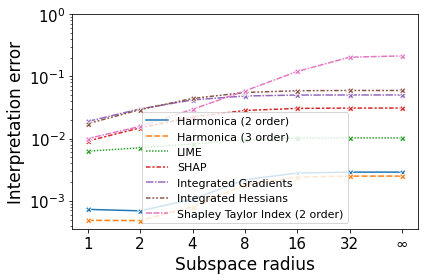

In [54]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

index = ["1","2","4","8","16","32","∞"] 
df_L2 = pd.DataFrame(L2_inconsistency.T, index, ["Harmonica (2 order)", "Harmonica (3 order)", "LIME", "SHAP", "Integrated Gradients", "Integrated Hessians", "Shapley Taylor Index (2 order)"]) 

ax_L2 = sns.lineplot(data=df_L2, marker='X') 
# ax_L2.set(xlabel='subspace radius', ylabel='Inconsistency') 
plt.xlabel('Subspace radius', fontsize=17)
plt.ylabel('Interpretation error', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_L2.set(yscale='log')
ax_L2.set(ylim=[0,1])
ax_L2.legend(fontsize=11)
fig_L2 = ax_L2.get_figure() 
plt.tight_layout()
fig_L2.savefig("interpretation-error-imdb-plot-l2.pdf")

In [40]:
# print(L2_inconsistency)

In [41]:
# import numpy as np 
# import pandas as pd 
# import seaborn as sns 
# from copy import deepcopy

# index = ["1","2","4","8","16","32","∞"] 
# df_L2 = pd.DataFrame(deepcopy(L2_inconsistency.T), index, ["Harmonica (2 order)", "Harmonica (3 order)", "LIME", "SHAP", "Integrated Gradients", "Integrated Hessians", "Shapley Taylor Interaction Index"]) 
# print(df_L2)
# df_L2["LIME"] = df_L2["LIME"] / df_L2["Harmonica (2 order)"]
# df_L2["SHAP"] = df_L2["SHAP"] / df_L2["Harmonica (2 order)"]
# df_L2["Integrated Gradients"] = df_L2["Integrated Gradients"] / df_L2["Harmonica (2 order)"]
# df_L2["Integrated Hessians"] = df_L2["Integrated Hessians"] / df_L2["Harmonica (2 order)"]
# df_L2["Shapley Taylor Interaction Index"] = df_L2["Shapley Taylor Interaction Index"] / df_L2["Harmonica (2 order)"]
# del df_L2["Harmonica (2 order)"]
# del df_L2["Harmonica (3 order)"]
# print(df_L2)
# ax_L2 = sns.lineplot(data=df_L2, marker='X') 
# ax_L2.set(xlabel='Subspace radius', ylabel='L2 norm ratio to Harmonica (2 order)') 
# # ax_L2.set(yscale='log')
# # ax_L2.set(ylim=[0,1])
# fig_L2 = ax_L2.get_figure() 
# fig_L2.savefig("inconsistency-har2nd-ratio-imdb-plot-l2.png")

/home/hehaowei/.conda/envs/gdn_battery/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


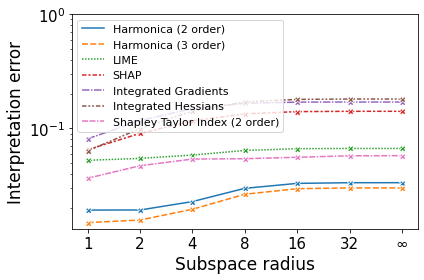

In [56]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

index = ["1","2","4","8","16","32","∞"] 
df_L1 = pd.DataFrame(L1_inconsistency.T, index, ["Harmonica (2 order)", "Harmonica (3 order)", "LIME", "SHAP", "Integrated Gradients", "Integrated Hessians", "Shapley Taylor Index (2 order)"]) 

ax_L1 = sns.lineplot(data=df_L1, marker='X') 
# ax_L1.set(xlabel='subspace radius', ylabel='Inconsistency') 
plt.xlabel('Subspace radius', fontsize=17)
plt.ylabel('Interpretation error', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_L1.set(yscale='log')
ax_L1.set(ylim=[0,1])
ax_L1.legend(fontsize=11)
fig_L1 = ax_L1.get_figure() 
plt.tight_layout()
fig_L1.savefig("interpretation-error-imdb-plot-l1.pdf")

/home/hehaowei/.conda/envs/gdn_battery/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


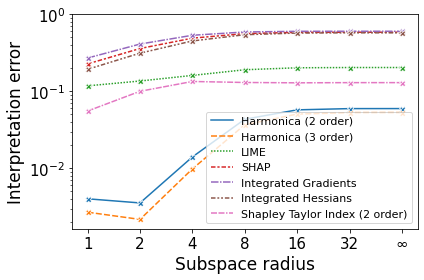

In [57]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


index = ["1","2","4","8","16","32","∞"]
df_L0 = pd.DataFrame(L0_inconsistency.T, index, ["Harmonica (2 order)", "Harmonica (3 order)", "LIME", "SHAP", "Integrated Gradients", "Integrated Hessians", "Shapley Taylor Index (2 order)"]) 

ax_L0 = sns.lineplot(data=df_L0, marker='X') 
# ax_L0.set(xlabel='subspace radius', ylabel='Inconsistency') 
plt.xlabel('Subspace radius', fontsize=17)
plt.ylabel('Interpretation error', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_L0.set(yscale='log')
ax_L0.set(ylim=[0,1])
ax_L0.legend(fontsize=11)
fig_L0 = ax_L0.get_figure() 
plt.tight_layout()
fig_L0.savefig("interpretation-error-imdb-plot-l0.pdf")